**Criando funções para a extração das informações dos produtos**

In [1]:
# Function to extract Product Title
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("h1", attrs={"class":'product-name'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string


def get_info(soup):

    try:
        # Outer Tag Object
        info = soup.find("div", attrs={"class":"product-main-info"})

        # Inner NavigatableString Object
        info_value = info.text

        # Title as a string value
        info_string = info_value.strip().split()

    except AttributeError:
        info_string = ""

    return info_string


def get_price(soup):

    try:
        # Outer Tag Object
        price = soup.find("span", attrs={"data-app":"product.price"})

        # Inner NavigatableString Object
        price_value = price.text

        # Title as a string value
        price_string = price_value.strip()

    except AttributeError:
        price_string = ""

    return price_string

In [2]:
import time

# Marque o tempo de início
start_time = time.time()

# Execute seu código de raspagem aqui
import requests
from bs4 import BeautifulSoup
import datetime

# Headers for request
HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36', 'Accept-Language': 'pt-BR, pt;q=0.9'})

# Número total de páginas
num_pages = 2
# criando um dicionário para transformar em dataframe
dados = {"Nome_Produto":[],"Codigo_Produto":[],"Preço_Coleta":[],"Url_Coleta":[],"Data_coleta":[]}

for i in range(1, num_pages + 1):

  url = f'https://www.marchio.com/loja/catalogo.php?loja=1243088&categoria=333&pg={i}'

  # HTTP Request
  webpage = requests.get(url, headers=HEADERS)

  # Soup Object containing all data
  soup = BeautifulSoup(webpage.content, "html.parser")

  links = soup.find_all("a", attrs={'class':'product-info'})


  link_list = []

  for link in links:
    link_list.append(link['href'])

  for link in link_list:

    url_coleta = link

    new_webpage = requests.get(url_coleta, headers=HEADERS)
    new_soup = BeautifulSoup(new_webpage.content, "html.parser")

    # nome_produto = new_soup.find("h1", attrs={"class":'product-name'}).text.strip()
    # codigo_produto = new_soup.find("div", attrs={"class":"product-main-info"}).text.strip().split()
    # preco_coleta = new_soup.find("span", attrs={"class":"current-price"}).text.strip()
    data_coleta = datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S")

    dados["Nome_Produto"].append(get_title(new_soup))
    dados["Codigo_Produto"].append(get_info(new_soup))
    dados["Preço_Coleta"].append(get_price(new_soup))
    dados["Url_Coleta"].append(url_coleta)
    dados["Data_coleta"].append(data_coleta)


# Deu certinho
def print_data(dados):
  for prod,info in dados.items():
      print(prod,info)


print('*----------------------------Apresentando os resultados----------------*')
print_data(dados)

# Marque o tempo de término
end_time = time.time()

# Calcule a diferença, que é o tempo que seu código levou para executar
elapsed_time = end_time - start_time

print('*----------------------------------------------------------------------*')

print(f"A raspagem levou {round(elapsed_time,2)} segundos para ser concluída.")


*----------------------------Apresentando os resultados----------------*
Nome_Produto ['CHURRASQUEIRA 4 ESPETOS  TIJ. PINT. VERMELHA', 'Barraca iglu azul 4 pessoas', 'Barraca 2 pessoas camping', 'Abridor garrafa/furador lata preto - ya18', 'PISCINA FEIJAO AZUL SEM TAMPA 500L', 'PISCINA FEIJAO AZUL SEM TAMPA 300L', 'CHURRASQUEIRA ARAGUAIA', 'Barraca 3 pessoas camping', 'CHURRASQUEIRA ELETRICA GRILL 220V', 'Barraca 4 pessoas camping', 'BOMBA ELETRICA P/ GALAO DE AGUA RECARREGAVEL', 'Lavadora alta pressao hlx 110 vm 1400 w 220 v', 'MANGUEIRA PL JARDIM KING 30M AZUL LISA', 'CHURRASQUEIRA LISA PREDIAL 65CM 4 ESPETOS - WORLD']
Codigo_Produto [['Ref:', '114238', 'Marca:', 'WORLD', 'GRILL', 'Modelo:', 'CH6501'], ['Ref:', '101053', 'Marca:', 'MOR*', 'Modelo:', '009035'], ['Ref:', '112910', 'Marca:', 'ANTARES', 'Modelo:', '17010101001'], ['Ref:', '107049', 'Marca:', 'YAZI', 'Modelo:', '3780'], ['Ref:', '118583', 'Marca:', 'AFORT', 'Modelo:', 'P1010003'], ['Ref:', '118585', 'Marca:', 'AFORT', 'Mo

In [3]:
import pandas as pd

df =pd.DataFrame.from_dict(dados)
df

,Nome_Produto,Codigo_Produto,Preço_Coleta,Url_Coleta,Data_coleta
0,CHURRASQUEIRA 4 ESPETOS TIJ. PINT. VERMELHA,"[Ref:, 114238, Marca:, WORLD, GRILL, Modelo:, ...","1.176,39",https://www.marchio.com/churrasqueira-4-espeto...,"15/12/2023, 13:37:58"
1,Barraca iglu azul 4 pessoas,"[Ref:, 101053, Marca:, MOR*, Modelo:, 009035]","273,01",https://www.marchio.com/barraca-iglu-azul-4-pe...,"15/12/2023, 13:37:59"
2,Barraca 2 pessoas camping,"[Ref:, 112910, Marca:, ANTARES, Modelo:, 17010...","176,78",https://www.marchio.com/barraca-2-pessoas-camping,"15/12/2023, 13:38:01"
3,Abridor garrafa/furador lata preto - ya18,"[Ref:, 107049, Marca:, YAZI, Modelo:, 3780]","5,90",https://www.marchio.com/abridor-garrafafurador...,"15/12/2023, 13:38:02"
4,PISCINA FEIJAO AZUL SEM TAMPA 500L,"[Ref:, 118583, Marca:, AFORT, Modelo:, P1010003]","436,41",https://www.marchio.com/piscina-feijao-azul-se...,"15/12/2023, 13:38:03"
5,PISCINA FEIJAO AZUL SEM TAMPA 300L,"[Ref:, 118585, Marca:, AFORT, Modelo:, P1010004]","411,27",https://www.marchio.com/piscina-feijao-azul-se...,"15/12/2023, 13:38:04"
6,CHURRASQUEIRA ARAGUAIA,"[Ref:, 101086, Marca:, MOR*, Modelo:, 003007]","328,77",https://www.marchio.com/churrasqueira-araguaia,"15/12/2023, 13:38:05"
7,Barraca 3 pessoas camping,"[Ref:, 112909, Marca:, ANTARES, Modelo:, 17010...","215,20",https://www.marchio.com/barraca-3-pessoas-camping,"15/12/2023, 13:38:06"
8,CHURRASQUEIRA ELETRICA GRILL 220V,"[Ref:, 100096, Marca:, FISCHER, Modelo:, 4513....","325,14",https://www.marchio.com/churrasqueira-eletrica...,"15/12/2023, 13:38:08"
9,Barraca 4 pessoas camping,"[Ref:, 112908, Marca:, ANTARES, Modelo:, 17010...","253,73",https://www.marchio.com/barraca-4-pessoas-camping,"15/12/2023, 13:38:09"


In [8]:
df['Preço_Coleta'] = df['Preço_Coleta'].astype(float)

ValueError: ignored

In [13]:
df['Preço_Coleta'] = df['Preço_Coleta'].replace(',', '.')
df["Preço_Coleta"]

0     1.176,39
1       273,01
2       176,78
3         5,90
4       436,41
5       411,27
6       328,77
7       215,20
8       325,14
9       253,73
10       43,41
11      467,80
12      162,86
13    1.277,87
Name: Preço_Coleta, dtype: object

In [31]:
produtos_mais_caros = df[["Nome_Produto","Preço_Coleta"]].sort_values(by="Preço_Coleta",ascending=False)
produtos_mais_caros

,Nome_Produto,Preço_Coleta
13,CHURRASQUEIRA LISA PREDIAL 65CM 4 ESPETOS - WORLD,1277.87
0,CHURRASQUEIRA 4 ESPETOS TIJ. PINT. VERMELHA,1176.39
11,Lavadora alta pressao hlx 110 vm 1400 w 220 v,467.80
4,PISCINA FEIJAO AZUL SEM TAMPA 500L,436.41
5,PISCINA FEIJAO AZUL SEM TAMPA 300L,411.27
6,CHURRASQUEIRA ARAGUAIA,328.77
8,CHURRASQUEIRA ELETRICA GRILL 220V,325.14
1,Barraca iglu azul 4 pessoas,273.01
9,Barraca 4 pessoas camping,253.73
7,Barraca 3 pessoas camping,215.20


<Axes: xlabel='Nome_Produto'>

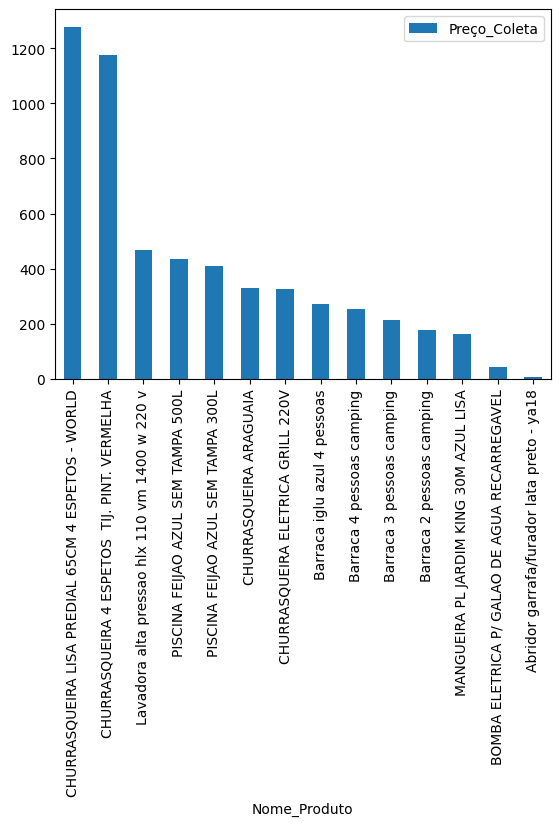

In [33]:
produtos_mais_caros.plot(x="Nome_Produto", y="Preço_Coleta",kind="bar")